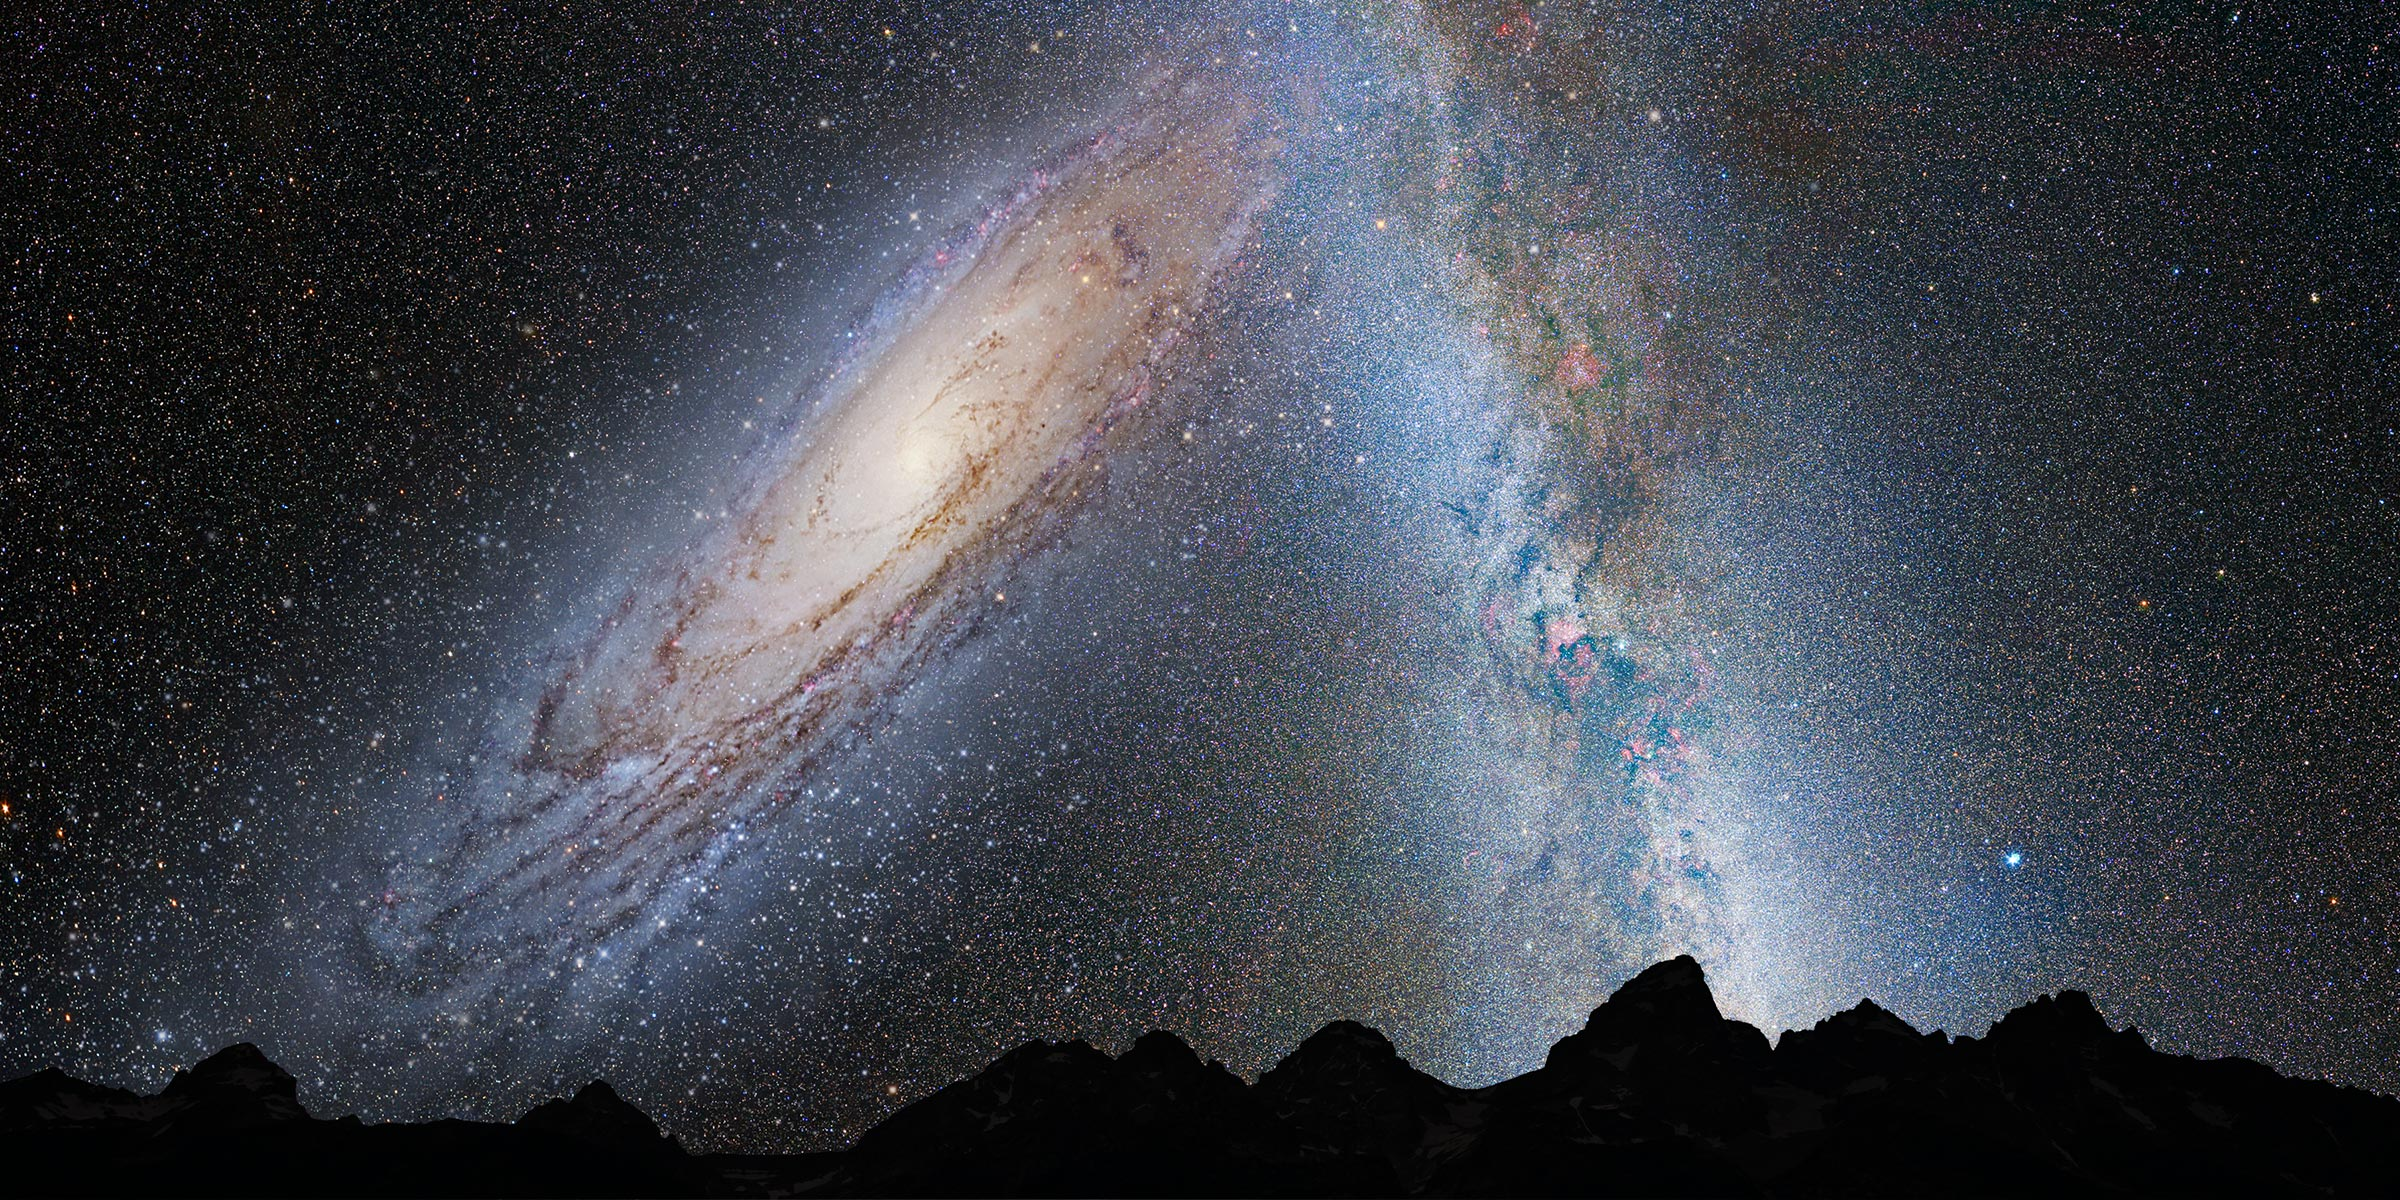

In [1]:
from IPython.display import Image
Image(filename='image/STScI-H-galaxies-1220e-nasa.jpg')

<p>THIS NOTEBOOK HAS A COMPANION PIECE IN THE PROGRAMMING BOOK.</p>
<p>PLEASE REFER TO: <b>42.2 Multiple Passes Through Dataset v Single-Pass</b></p>

In [8]:
# run this code for the first two algorithms
with open('../datafile/galaxy_coordinates.txt', 'r') as inFile:
    LoS = inFile.read().splitlines()
    LoS.pop(0) # remove the label line
    LoL = []
    for record in LoS:
        LoL.append(record.split())
    for record in LoL:
        # here we coerce the coordinates from strings into floats
        record[1], record[2] = float(record[1]), float(record[2])


In [33]:
# run this code for the last algorithm
with open('../datafile/dec_sort_galaxy_coor.txt', 'r') as inFile:
    LoS = inFile.read().splitlines()
    LoS.pop(0) # remove the label line
    LoL = []
    for record in LoS:
        LoL.append(record.split())
    for record in LoL:
        # here we coerce the coordinates from strings into floats
        record[1], record[2] = float(record[1]), float(record[2])

<b>We consider any two objects a candidate pair if they are at or within a distance of 1.5 arcseconds of each other.</b>
To determine this, we apply the formula $\sqrt{(RA_a - RA_b)^2 + (dec_a - dec_b)^2} \le r$, where RA and dec are the right ascension and declination of objects a and b.
In our dataset, RA and dec are given in decimal degrees; and 1.5 arcseconds equals <b>0.000416667</b> decimal degrees.

<b>Let's time the implementations of our algorithms</b>

In [5]:
%%timeit
r = 0.000416667 # define r so the number doesn't appear as a magic number in the code
candidate_pairs_n = set()
for i in range(len(LoL)):
    for j in range(len(LoL)):
        # do not process the same record
        if LoL[i][0] != LoL[j][0] and\
         ((LoL[i][1] - LoL[j][1])**2\
        + (LoL[i][2] - LoL[j][2])**2)**(1/2) <= r:
          candidate_pairs_n.add(frozenset([LoL[i][0], LoL[j][0]]))


550 ms ± 26.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
r = 0.000416667 # define r so the number doesn't appear as a magic number in the code
candidate_pairs_n_half = set()
for i in range(len(LoL)-1):
    for j in range(i+1, len(LoL)):
        # do not process the same record
        if LoL[i][0] != LoL[j][0] and\
         ((LoL[i][1] - LoL[j][1])**2\
        + (LoL[i][2] - LoL[j][2])**2)**(1/2) <= r:
          candidate_pairs_n_half.add(frozenset([LoL[i][0], LoL[j][0]]))


287 ms ± 8.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit
r = 0.000416667 # define r so the number doesn't appear as a magic number in the code
candidate_pairs_lin = set()
for i in range(len(LoL)-5):
    # unrolling the loop
    if ((LoL[i][1] - LoL[i+1][1])**2\
      + (LoL[i][2] - LoL[i+1][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+1][0]]))
    if ((LoL[i][1] - LoL[i+2][1])**2\
      + (LoL[i][2] - LoL[i+2][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+2][0]]))
    if ((LoL[i][1] - LoL[i+3][1])**2\
      + (LoL[i][2] - LoL[i+3][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+3][0]]))
    if ((LoL[i][1] - LoL[i+4][1])**2\
      + (LoL[i][2] - LoL[i+4][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+4][0]]))
    if ((LoL[i][1] - LoL[i+5][1])**2\
      + (LoL[i][2] - LoL[i+5][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+5][0]]))

    if i == len(LoL)-6:
        if ((LoL[i+1][1] - LoL[i+2][1])**2\
          + (LoL[i+1][2] - LoL[i+2][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+1][0], LoL[i+2][0]]))
        if ((LoL[i+1][1] - LoL[i+3][1])**2\
          + (LoL[i+1][2] - LoL[i+3][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+1][0], LoL[i+3][0]]))
        if ((LoL[i+1][1] - LoL[i+4][1])**2\
          + (LoL[i+1][2] - LoL[i+4][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+1][0], LoL[i+4][0]]))
        if ((LoL[i+1][1] - LoL[i+5][1])**2\
          + (LoL[i+1][2] - LoL[i+5][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+1][0], LoL[i+5][0]]))
            
        if ((LoL[i+2][1] - LoL[i+3][1])**2\
          + (LoL[i+2][2] - LoL[i+3][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+2][0], LoL[i+3][0]]))
        if ((LoL[i+2][1] - LoL[i+4][1])**2\
          + (LoL[i+2][2] - LoL[i+4][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+2][0], LoL[i+4][0]]))
        if ((LoL[i+2][1] - LoL[i+5][1])**2\
          + (LoL[i+2][2] - LoL[i+5][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+2][0], LoL[i+5][0]]))
            
        if ((LoL[i+3][1] - LoL[i+4][1])**2\
          + (LoL[i+3][2] - LoL[i+4][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+3][0], LoL[i+4][0]]))
        if ((LoL[i+3][1] - LoL[i+5][1])**2\
          + (LoL[i+3][2] - LoL[i+5][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+3][0], LoL[i+5][0]]))
            
        if ((LoL[i+4][1] - LoL[i+5][1])**2\
          + (LoL[i+4][2] - LoL[i+5][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+4][0], LoL[i+5][0]]))

2.8 ms ± 89.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<b>Let's rerun the code so the sets-of-sets that hold candidate pairs are saved in session memory</b>

In [9]:
r = 0.000416667 # define r so the number doesn't appear as a magic number in the code
candidate_pairs_n = set()
for i in range(len(LoL)):
    for j in range(len(LoL)):
        # do not process the same record
        if LoL[i][0] != LoL[j][0] and\
         ((LoL[i][1] - LoL[j][1])**2\
        + (LoL[i][2] - LoL[j][2])**2)**(1/2) <= r:
          candidate_pairs_n.add(frozenset([LoL[i][0], LoL[j][0]]))

In [11]:
r = 0.000416667 # define r so the number doesn't appear as a magic number in the code
candidate_pairs_n_half = set()
for i in range(len(LoL)-1):
    for j in range(i+1, len(LoL)):
        # do not process the same record
        if LoL[i][0] != LoL[j][0] and\
         ((LoL[i][1] - LoL[j][1])**2\
        + (LoL[i][2] - LoL[j][2])**2)**(1/2) <= r:
          candidate_pairs_n_half.add(frozenset([LoL[i][0], LoL[j][0]]))

In [44]:
r = 0.000416667 # define r so the number doesn't appear as a magic number in the code
candidate_pairs_lin = set()
for i in range(len(LoL)-5):
    # unrolling the loop
    if ((LoL[i][1] - LoL[i+1][1])**2\
      + (LoL[i][2] - LoL[i+1][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+1][0]]))
    if ((LoL[i][1] - LoL[i+2][1])**2\
      + (LoL[i][2] - LoL[i+2][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+2][0]]))
    if ((LoL[i][1] - LoL[i+3][1])**2\
      + (LoL[i][2] - LoL[i+3][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+3][0]]))
    if ((LoL[i][1] - LoL[i+4][1])**2\
      + (LoL[i][2] - LoL[i+4][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+4][0]]))
    if ((LoL[i][1] - LoL[i+5][1])**2\
      + (LoL[i][2] - LoL[i+5][2])**2)**(1/2) <= r:
        candidate_pairs_lin.add(frozenset([LoL[i][0], LoL[i+5][0]]))

    if i == len(LoL)-6:
        if ((LoL[i+1][1] - LoL[i+2][1])**2\
          + (LoL[i+1][2] - LoL[i+2][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+1][0], LoL[i+2][0]]))
        if ((LoL[i+1][1] - LoL[i+3][1])**2\
          + (LoL[i+1][2] - LoL[i+3][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+1][0], LoL[i+3][0]]))
        if ((LoL[i+1][1] - LoL[i+4][1])**2\
          + (LoL[i+1][2] - LoL[i+4][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+1][0], LoL[i+4][0]]))
        if ((LoL[i+1][1] - LoL[i+5][1])**2\
          + (LoL[i+1][2] - LoL[i+5][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+1][0], LoL[i+5][0]]))
            
        if ((LoL[i+2][1] - LoL[i+3][1])**2\
          + (LoL[i+2][2] - LoL[i+3][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+2][0], LoL[i+3][0]]))
        if ((LoL[i+2][1] - LoL[i+4][1])**2\
          + (LoL[i+2][2] - LoL[i+4][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+2][0], LoL[i+4][0]]))
        if ((LoL[i+2][1] - LoL[i+5][1])**2\
          + (LoL[i+2][2] - LoL[i+5][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+2][0], LoL[i+5][0]]))
            
        if ((LoL[i+3][1] - LoL[i+4][1])**2\
          + (LoL[i+3][2] - LoL[i+4][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+3][0], LoL[i+4][0]]))
        if ((LoL[i+3][1] - LoL[i+5][1])**2\
          + (LoL[i+3][2] - LoL[i+5][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+3][0], LoL[i+5][0]]))
            
        if ((LoL[i+4][1] - LoL[i+5][1])**2\
          + (LoL[i+4][2] - LoL[i+5][2])**2)**(1/2) <= r:
            candidate_pairs_lin.add(frozenset([LoL[i+4][0], LoL[i+5][0]]))

<b>Now we can compare the different resultsets to ensure they are the same</b>

In [45]:
candidate_pairs_lin == candidate_pairs_n

True